# Tarea 4 - Parte 2
17/04/2023<br>
Hans Yadiel Sánchez Mora<br>
hanssanchez427@gmail.com<br>
312 624 89 50

3. Escriba una clase con las siguientes funcionalidades:
- Al instanciar un objeto, lee un conjunto de datos numéricos. Por ejemplo puede usar el mismo conjunto de datos iris.csv. Instancie los datos en un dataframe de Pandas
- Implemente un método que calcule las estadísticas descriptivas básicas de cada una de las variables.
- Implemente un método que entregue los nombre de las variables disponibles.
- Implemente un método que reciba el nombre de una variable disponible dentro del objeto ( en el  dataframe) y regrese: sus estadísticas básicas:  media, mediana, desviación, percentiles q25, q50, q75 y dibuje un histograma de la distribución de la variable.

In [1]:
# Importación de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot


# Creación de una clase
class Iris:
    
    # Función inicial o constructor 
    def __init__(self):
        
        # lectura del archivo
        self.dateframe = pd.read_csv(r'Recursos/Iris.csv')
        
    # Función de columnas disponibles
    def available_columns(self):
        
        # Definición de variable para mejor visualización
        columns = self.dateframe.columns

        # Ciclo para impresión de valores
        for column in columns:
            print(column, end=", ")
          
    # Función de estadísticas básicas
    def basic_descriptive_statistics(self, specific_column = None): # None es para que sea opcional
        
        # Lisado de columnas para iteración
        columns = list(self.dateframe.columns)
        
        # Variable gobal para validar tipos de datos
        global valid
        
        # Si el usuario envía una columna de su interés
        if specific_column:
            
            # Si la columna específica es un String
            if type(specific_column) == str:
                
                # Si la columna específica es diferente al Id
                if specific_column != 'Id':

                    # Si la columna específica existe dentro del array
                    if specific_column in columns:

                        # Filtro en el dataframe según columna
                        values = self.dateframe[specific_column]

                        # Definición de array
                        list_values = []

                        # Ciclo para agregar todos los valores en un array para posterior iteración
                        for value in values:

                            # Si son valores cuantitativos
                            if type(value) != str:
                                
                                #Agrega los valores a una lista
                                list_values.append(value)
                                
                                # Valores validos
                                valid = True

                            # Si son valores cualitativos
                            else: 
                                
                                # Valores invalidos
                                valid = False

                        # Validación de valores cuantitativos y cualitativos
                        if valid == False: 
                            print("No es posible cálcular los valores ya que sus datos no son cuantitativos...\n\nintentalo nuevamente.")

                        # Si la lista de valores tiene datos
                        if list_values:

                            # Llama la función de graficar
                            self.graph(list_values, specific_column)

                    # Si la columna específica NO existe
                    else:
                        print("No existe la columna que especificaste...\n\nintentalo nuevamente.")

                # Si la columna específica es igual al Id
                else:
                    print("Esta columna NO aplica ya que es el Id...\n\nintentalo nuevamente.")
            
            # Si la columna específica NO es un String
            else:
                print("Lo que enviaste NO es un formato valido de consulta...\n\nintentalo nuevamente.")
                
        # Si el usuario NO envía ninguna columna de interés
        else:
            
            # Ciclo para recorrer las columnas del archivo
            for column in columns:
                
                # Filtro en el dataframe según columna
                list_variables = self.dateframe[column]

                # Definición de array
                list_values = []

                # Ciclo para agregar todos los valores en un array para posterior iteración
                for list_variable in list_variables: 
                    
                    # Si los valores son cuantitativos
                    if type(list_variable) != str:
                        
                        #Agrega los valores a una lista
                        list_values.append(list_variable)

                # Si la lista de valores tiene datos
                if list_values:
                    
                    # Si la columna es diferente al Id cálcula
                    if column != 'Id':
                        
                        # Separador
                        for i in range(112): print('-', end="")
                            
                        # Llama la función de graficar
                        self.graph(list_values, column)
                        
            # Separador
            for i in range(112): print('-', end="")
            
    # Función para graficar (optimizar código)
    def graph(self, list_values, column):
        
        # Título de columna por iteración
        print("\nTotal de datos en la variable " , column , " => " , len(list_values), "\n")

        # Creación de diccionario para optimizar
        results = {
            "Media": round(np.mean(list_values), 3),
            "Mediana": round(np.median(list_values), 3),
            "Desviación": round(np.std(list_values), 3),
            "Percentil q25": round(np.percentile(list_values, 25), 3),
            "Percentil q50": round(np.percentile(list_values, 50), 3),
            "Percentil q75": round(np.percentile(list_values, 75), 3)
        }

        # Impresión del diccionario
        for key, values in results.items():
            print(key, " => ", values)

        # Datos
        mean = round(np.mean(list_values), 3), # Media de cada variable
        std = round(np.std(list_values), 3) # Desviación de cada variable
        data = np.random.normal(mean, std, len(list_values)) # Definción de datos

        # Graficando histograma
        plot.rcParams["figure.figsize"] = (16, 10)
        plot.hist(data, len(list_values), color='#F2AB6D', alpha=1, edgecolor = 'black',  linewidth=1)
        plot.ylabel('Frequencia')
        plot.xlabel('Valores')
        plot.title('Histograma')
        plot.grid(axis='both', color='k')
        plot.show()

# Instancia del objeto
iris = Iris()

# Acceso a la lectura del archivo Iris.csv
iris.dateframe

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
iris.available_columns()

Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species, 

----------------------------------------------------------------------------------------------------------------
Total de datos en la variable  SepalLengthCm  =>  150 

Media  =>  5.843
Mediana  =>  5.8
Desviación  =>  0.825
Percentil q25  =>  5.1
Percentil q50  =>  5.8
Percentil q75  =>  6.4


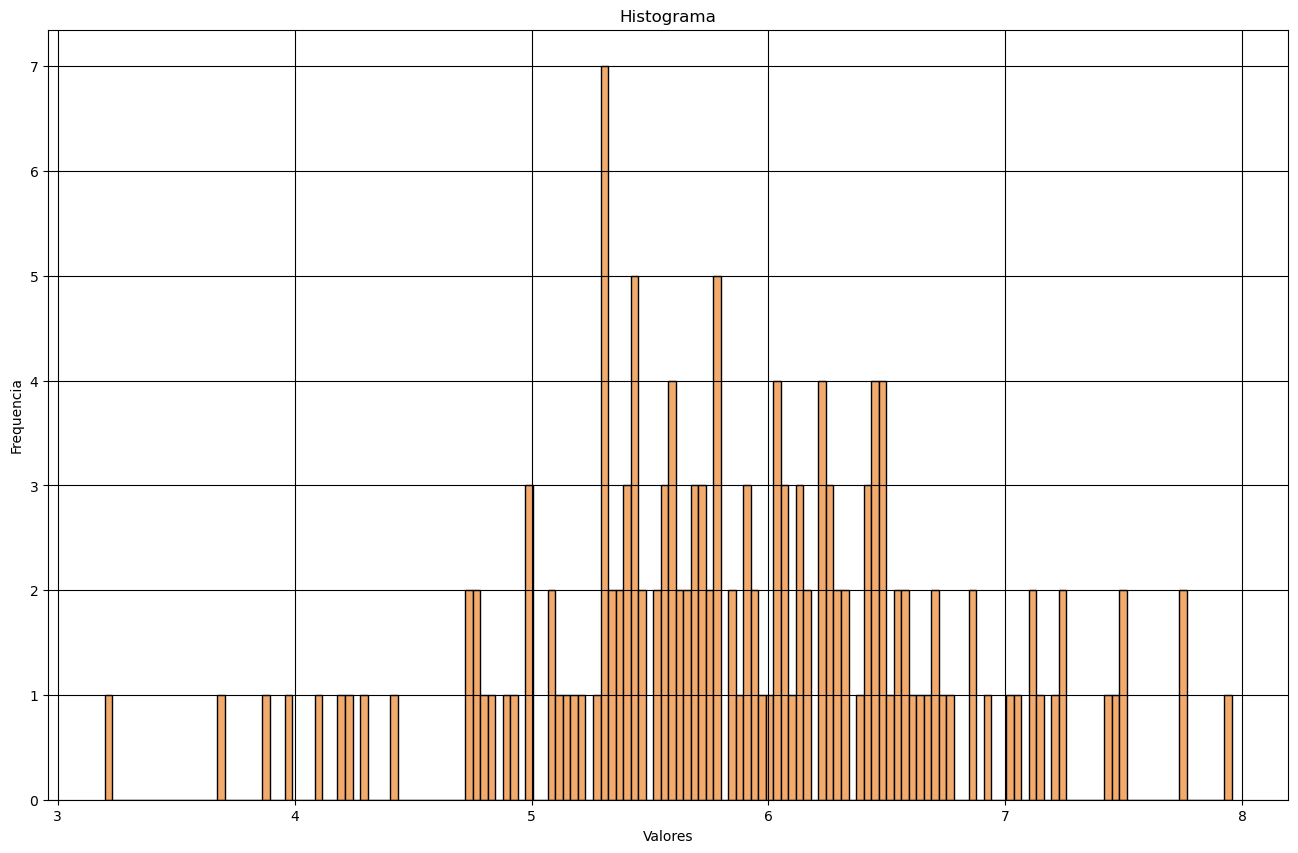

----------------------------------------------------------------------------------------------------------------
Total de datos en la variable  SepalWidthCm  =>  150 

Media  =>  3.054
Mediana  =>  3.0
Desviación  =>  0.432
Percentil q25  =>  2.8
Percentil q50  =>  3.0
Percentil q75  =>  3.3


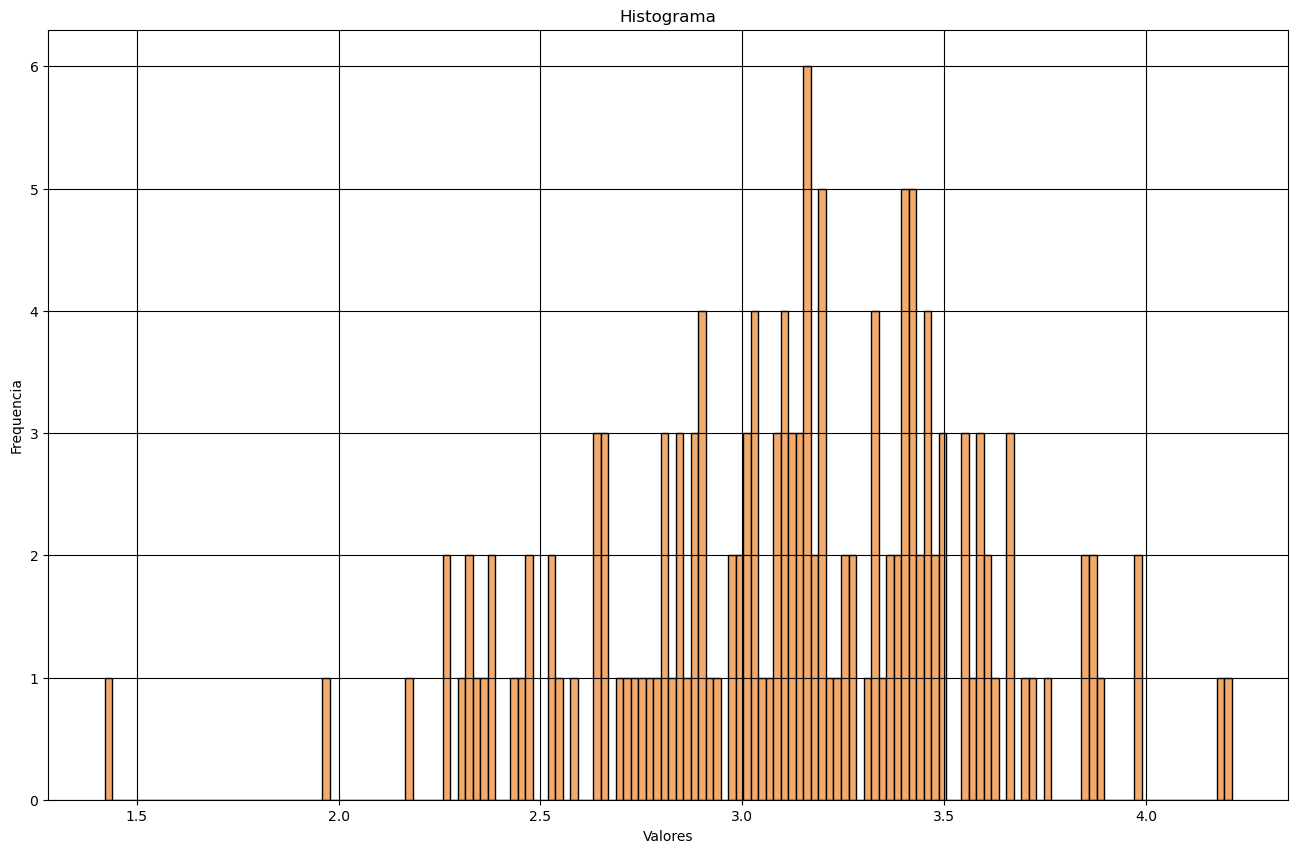

----------------------------------------------------------------------------------------------------------------
Total de datos en la variable  PetalLengthCm  =>  150 

Media  =>  3.759
Mediana  =>  4.35
Desviación  =>  1.759
Percentil q25  =>  1.6
Percentil q50  =>  4.35
Percentil q75  =>  5.1


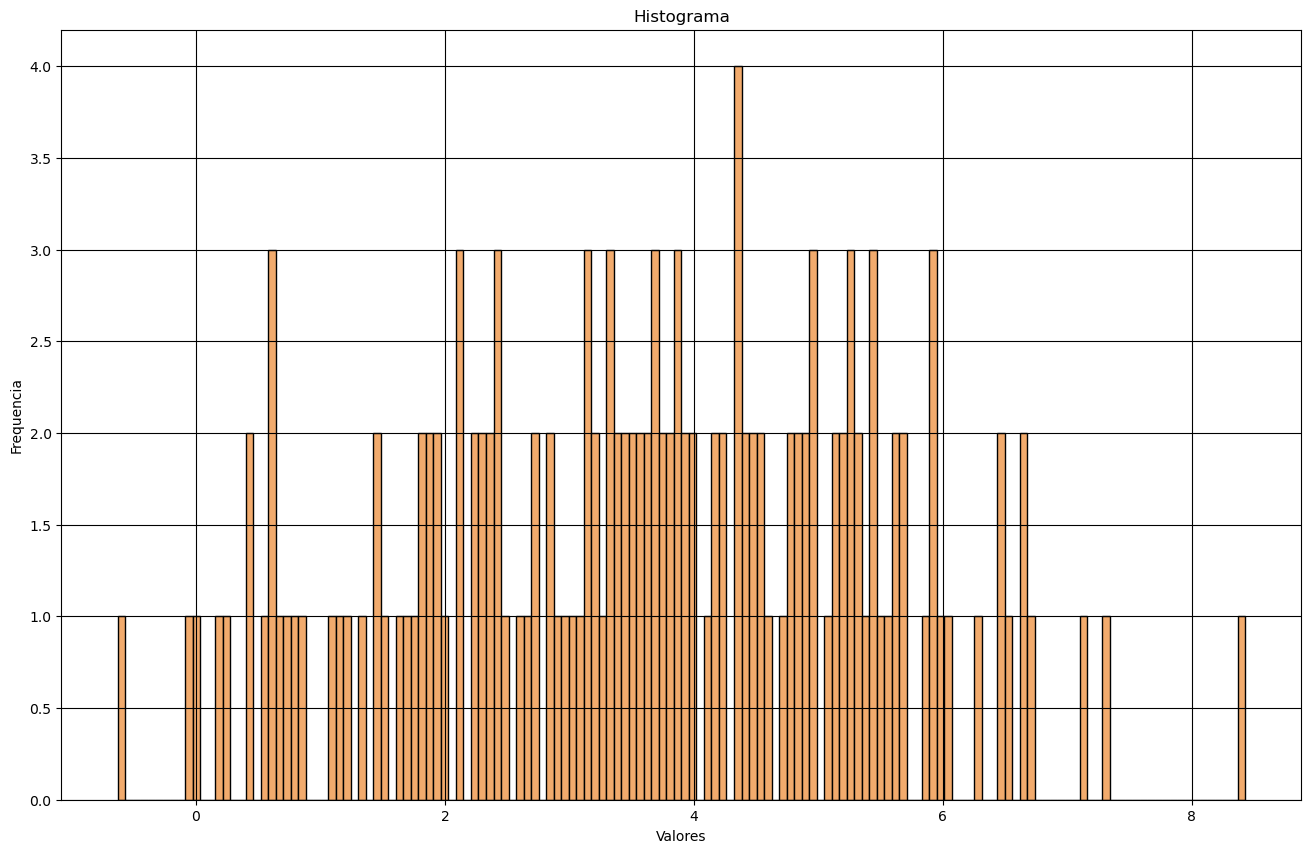

----------------------------------------------------------------------------------------------------------------
Total de datos en la variable  PetalWidthCm  =>  150 

Media  =>  1.199
Mediana  =>  1.3
Desviación  =>  0.761
Percentil q25  =>  0.3
Percentil q50  =>  1.3
Percentil q75  =>  1.8


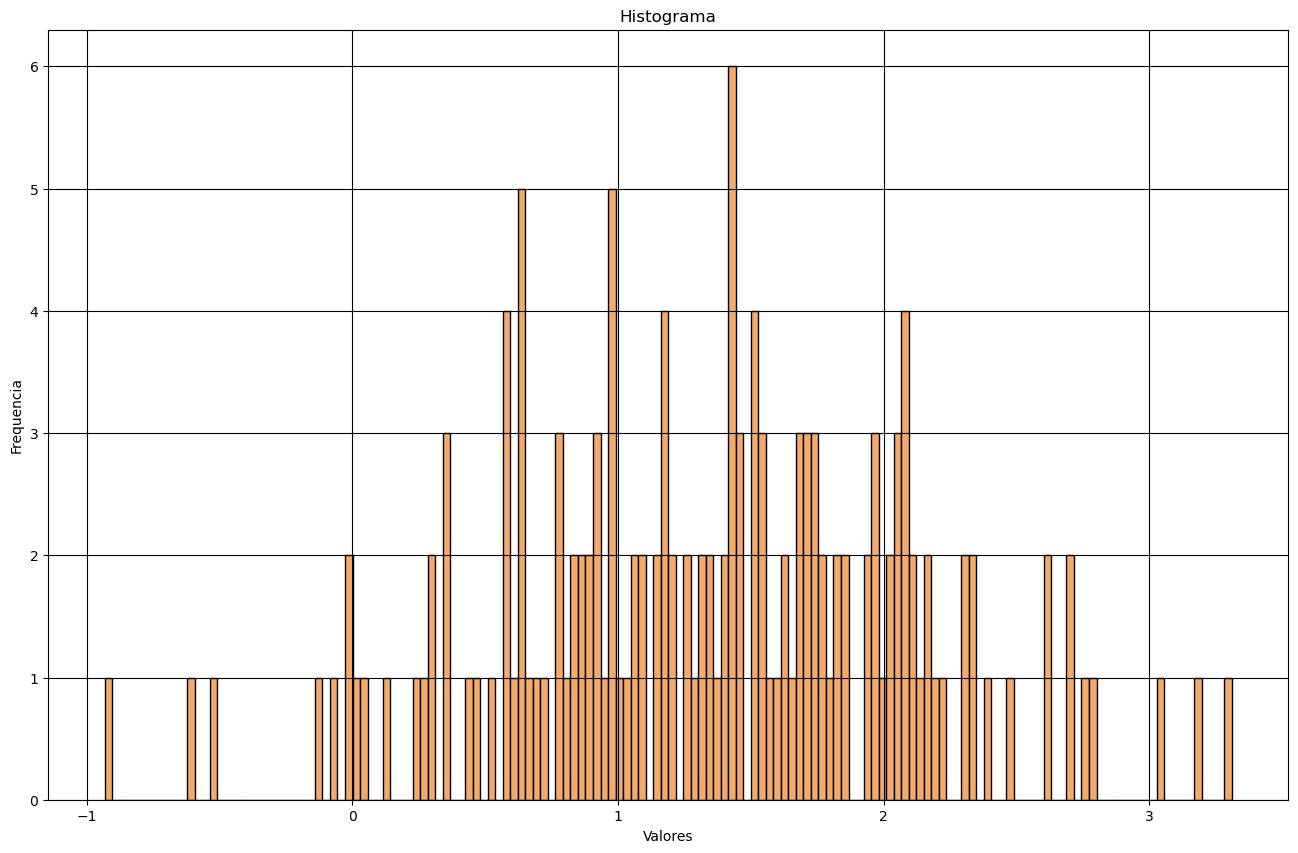

----------------------------------------------------------------------------------------------------------------

In [3]:
# Ejemplo SIN parametros para graficar todas las variables cuantitativas
iris.basic_descriptive_statistics()

In [4]:
iris.basic_descriptive_statistics('Id') # Ejemplo con parametro Id

Esta columna NO aplica ya que es el Id...

intentalo nuevamente.


In [5]:
iris.basic_descriptive_statistics('Species') # Ejemplo con parametro cualitativo

No es posible cálcular los valores ya que sus datos no son cuantitativos...

intentalo nuevamente.


In [6]:
iris.basic_descriptive_statistics('BJs6dw62') # Ejemplo de cualquier cosa

No existe la columna que especificaste...

intentalo nuevamente.


In [7]:
iris.basic_descriptive_statistics(65789) # Ejemplo de cualquier cosa de otro formato

Lo que enviaste NO es un formato valido de consulta...

intentalo nuevamente.



Total de datos en la variable  SepalLengthCm  =>  150 

Media  =>  5.843
Mediana  =>  5.8
Desviación  =>  0.825
Percentil q25  =>  5.1
Percentil q50  =>  5.8
Percentil q75  =>  6.4


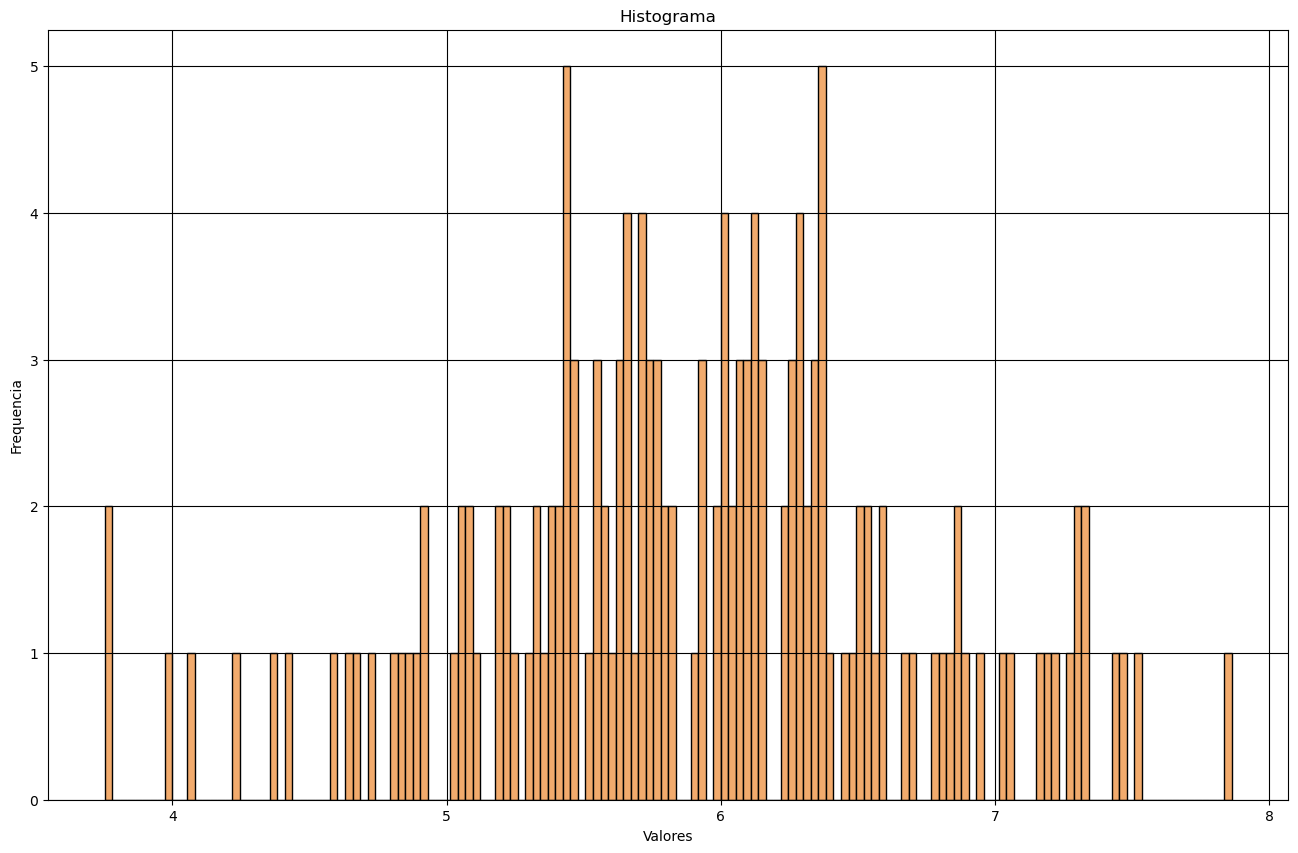

In [8]:
iris.basic_descriptive_statistics('SepalLengthCm') # Ejemplo con una columna real
